# Figure 3 Notebook

This notebook makes the figure which compares the different price paths isolating a specific damage function as well as the impact of EIS on CRRA price paths.

In [1]:
import sys
import datetime

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns

from src.analysis.output_unpacker import OutputUnpacker
from src.analysis.class_maker import make_class_instances
from src.tools import import_csv

# plotting parameters
color_list = ['#000000', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7'] * 2
marker_list = ['o', 's', 'P', '+', 'D', 'v', '3', 'm'] * 2
markersize = 6
linestyle_list = ['solid', 'dashed', 'dashdot', 'dotted'] * 4
linewidth = 2

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 
cdds_params={'axes.linewidth': 3,
 'axes.axisbelow': False,
 'axes.edgecolor': 'black',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'axes.titlesize': 20,
 'axes.labelsize': 20,
 'axes.titlelocation': 'left',
 'figure.facecolor': 'white',
 'figure.figsize': (18, 10),
 'lines.solid_capstyle': 'round',
 'lines.linewidth': 2.5,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'legend.frameon': False,
 'xtick.bottom': True,
 'xtick.major.width': 3,
 'xtick.major.size': 6,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False,
 'ytick.color' : 'black',
 'ytick.major.width': 3, 
 'ytick.major.size': 6,
 'axes.prop_cycle': plt.cycler(color=color_list, linestyle=linestyle_list),
 'font.size': 16,
 'font.family': 'serif'}
plt.rcParams.update(cdds_params)

node_times = [2020, 2030, 2060, 2100, 2150, 2200]
x_label = 'Year'

# make base filename
today = datetime.datetime.now()
year = str(today.year)
day = str(today.day)
month = str(today.month)

basefile = ''.join(["/data/keeling/a/adammb4/ClimateEcon/ez-climate/TCREZClimate/docs/figdump/", month, '-', day, '-', year, '-'])

## Make list of runs to analyze

For any run we want to appear in the final figure, the run number should go here.

In [2]:
#list1 = [3,19,31,43]
#list2 = [215, 218, 220, 223, 225, 228, 230, 233, 235, 238, 240, 243, 245, 248, 250]
#list3 = np.arange(255, 275, 1, dtype=int)
#runs = np.hstack((list1, list2, list3))

runs = np.arange(275, 291, 1, dtype=int)
runs

array([275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287,
       288, 289, 290])

## Make list of files of interest

Here we make lists of file prefixes (i.e., whatever the `name` parameter was when the simulation was executed) and paths. We take the list of paths and prefixes and make lists of filenames, which will be passed to `OutputUnpacker` later.

In [3]:
# import BPW_research_runs.csv

data_csv_file = 'BPW_research_runs'
param_names, run_info, param_vals = import_csv(data_csv_file, delimiter=',', indices=2)
all_run_names = np.array([run_info[i][1] for i in range(len(run_info))])

# this an array of run names that are being analyzed
run_names = all_run_names[runs]
N_runs = len(run_names)

# path list (just data directory N_runs times)
paths = ['/data/keeling/a/adammb4/ClimateEcon/ez-climate/TCREZClimate/data/'] * N_runs

# make list of full file names (path + run name + suffix) to be analyzed
output_list = [''.join([paths[file], run_names[file], "_node_period_output.csv"]) for file in range(N_runs)]
picklefile_list = [''.join([paths[file], run_names[file], "_log.pickle"]) for file in range(N_runs)]

## Make lists of necessary model classes

Make sure this matches the main file! To do this properly, the right classes with the right model parameters need to be initiated. 

In [4]:
tree_list, damage_list, climate_list, emit_baseline_list = make_class_instances(runs)

Damages imported successfully!
Damages imported successfully!
Damages imported successfully!
Damages imported successfully!
Damages imported successfully!
Damages imported successfully!
Damages imported successfully!
Damages imported successfully!
Damages imported successfully!
Damages imported successfully!
Damages imported successfully!
Damages imported successfully!
Damages imported successfully!
Damages imported successfully!
Damages imported successfully!
Damages imported successfully!


## Use `OutputUnpacker` object to extract values from files

In [5]:
# make one array of objects which correspond to the 'output' files (i.e., the files that end with
# _node_period_output.csv) and another for the pickle files
output_obj_list = [OutputUnpacker(output_list[file], run_names[file], 'output', 
                                    tree=tree_list[file], emit_baseline=emit_baseline_list[file],
                                    climate=climate_list[file], damage=damage_list[file]) for file in range(N_runs)]

pickle_obj_list = [OutputUnpacker(picklefile_list[file], run_names[file], 'pickle',
                                    tree=tree_list[file], emit_baseline=emit_baseline_list[file],
                                    climate=climate_list[file], damage=damage_list[file]) for file in range(N_runs)]

## Save fig?!

Turn on if you want the figure saved!

In [6]:
save_fig = True
runs

array([275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287,
       288, 289, 290])

## Import damage scatter points

In [7]:
path = '/data/keeling/a/adammb4/ClimateEcon/ez-climate/TCREZClimate/data/'

In [8]:
burke_2049_ssp2 = np.genfromtxt(''.join([path, 'ssp2_2049_t_d.csv']), delimiter=',')
burke_2049_ssp2_t, burke_2049_ssp2_d = burke_2049_ssp2.T

burke_2099_ssp2 = np.genfromtxt(''.join([path, 'ssp2_2099_t_d.csv']), delimiter=',')
burke_2099_ssp2_t, burke_2099_ssp2_d = burke_2099_ssp2.T

struct_data = np.genfromtxt("/data/keeling/a/adammb4/ClimateEcon/ez-climate/TCREZClimate/data/IPCC_WGII_RoseDamageEstimates.csv", 
                            delimiter=',', usecols=[0,1])
struct_T, struct_d = struct_data.T

hs_data = np.genfromtxt("/data/keeling/a/adammb4/ClimateEcon/ez-climate/TCREZClimate/data/IPCC_WGII_HowardSternerDamageEstimates.csv", 
                        delimiter=',', usecols=[0,1])
hs_T, hs_d = hs_data.T

## Do fits

In [9]:
gmst = np.arange(0, 7, 0.01)

In [10]:
size = 1000
burke_mid_b2 = np.random.normal(loc=3.09e-3, scale=4.76e-4, 
                                size=size)
burke_mid_b1 = np.random.normal(loc=1.24e-2, scale=1.90e-3, 
                                size=size)

burke_end_b2 = np.random.normal(loc=-2.33e-3, scale=4.75e-4, 
                                size=size)
burke_end_b1 = np.random.normal(loc=7.21e-2, scale=1.47e-2, 
                                size=size)

struct_b2 = np.random.normal(loc=2.3e-3, scale=8.53e-4, 
                                size=size)
struct_b1 = np.random.normal(loc=2.05e-3, scale=7.59e-4, 
                                size=size)

meta_b2 = np.random.normal(loc=6.85e-3, scale=2.43e-3, 
                                size=size)
meta_b1 = np.random.normal(loc=2.98e-4, scale=1.06e-4, 
                                size=size)

In [11]:
burke_mid_dam = gmst * (burke_mid_b2[:, None] * gmst + burke_mid_b1[:, None])
burke_end_dam = gmst * (burke_end_b2[:, None] * gmst + burke_end_b1[:, None])
struct_dam = gmst * (struct_b2[:, None] * gmst + struct_b1[:, None])
meta_dam = gmst * (meta_b2[:, None] * gmst + meta_b1[:, None])

In [12]:
burke_mid_mean = np.mean(burke_mid_dam, axis=0)
burke_end_mean = np.mean(burke_end_dam, axis=0)
struct_mean = np.mean(struct_dam, axis=0)
meta_mean = np.mean(meta_dam, axis=0)

In [13]:
burke_mid_66 = np.percentile(burke_mid_dam, 66, axis=0)
burke_mid_34 = np.percentile(burke_mid_dam, 34, axis=0)
burke_mid_95 = np.percentile(burke_mid_dam, 95, axis=0)
burke_mid_5 = np.percentile(burke_mid_dam, 5, axis=0)

burke_end_66 = np.percentile(burke_end_dam, 66, axis=0)
burke_end_34 = np.percentile(burke_end_dam, 34, axis=0)
burke_end_95 = np.percentile(burke_end_dam, 95, axis=0)
burke_end_5 = np.percentile(burke_end_dam, 5, axis=0)

struct_66 = np.percentile(struct_dam, 66, axis=0)
struct_34 = np.percentile(struct_dam, 34, axis=0)
struct_95 = np.percentile(struct_dam, 95, axis=0)
struct_5 = np.percentile(struct_dam, 5, axis=0)

meta_66 = np.percentile(meta_dam, 66, axis=0)
meta_34 = np.percentile(meta_dam, 34, axis=0)
meta_95 = np.percentile(meta_dam, 95, axis=0)
meta_5 = np.percentile(meta_dam, 5, axis=0)

## TP

In [14]:
tp_data = np.genfromtxt("/data/keeling/a/adammb4/ClimateEcon/ez-climate/TCREZClimate/data/TP_data.csv", delimiter=',')

tp_t, tp_d = tp_data.T

B_MEAN = 0.48
A_MEAN = -0.04

CONSUMP_INIT = 61.88 # trillion 2020 USD (from World Bank)
GLOB_GDP_INIT = 84.75 # trillion 2020 USD (from World Bank)
factor = CONSUMP_INIT/GLOB_GDP_INIT

DRAWS = 10**4
b_dist = np.random.normal(loc=B_MEAN, scale=0.02, size=DRAWS)
a_dist = np.random.normal(loc=A_MEAN, scale=0.01, size=DRAWS)

#b_dist = np.random.random(size=DRAWS) * B_MEAN
#a_dist = np.random.random(size=DRAWS) * A_MEAN

gmst_tp = np.arange(0, 10, 0.01)
tp_dam = factor * (b_dist[:, None] * gmst_tp + a_dist[:, None] * gmst_tp**2) * 0.01
tp_dam_mean = (B_MEAN * gmst_tp + A_MEAN * gmst_tp**2) * factor * 0.01

In [15]:
tp_66 = np.percentile(tp_dam, 66, axis=0)
tp_34 = np.percentile(tp_dam, 34, axis=0)
tp_95 = np.percentile(tp_dam, 95, axis=0)
tp_5 = np.percentile(tp_dam, 5, axis=0)

# New one

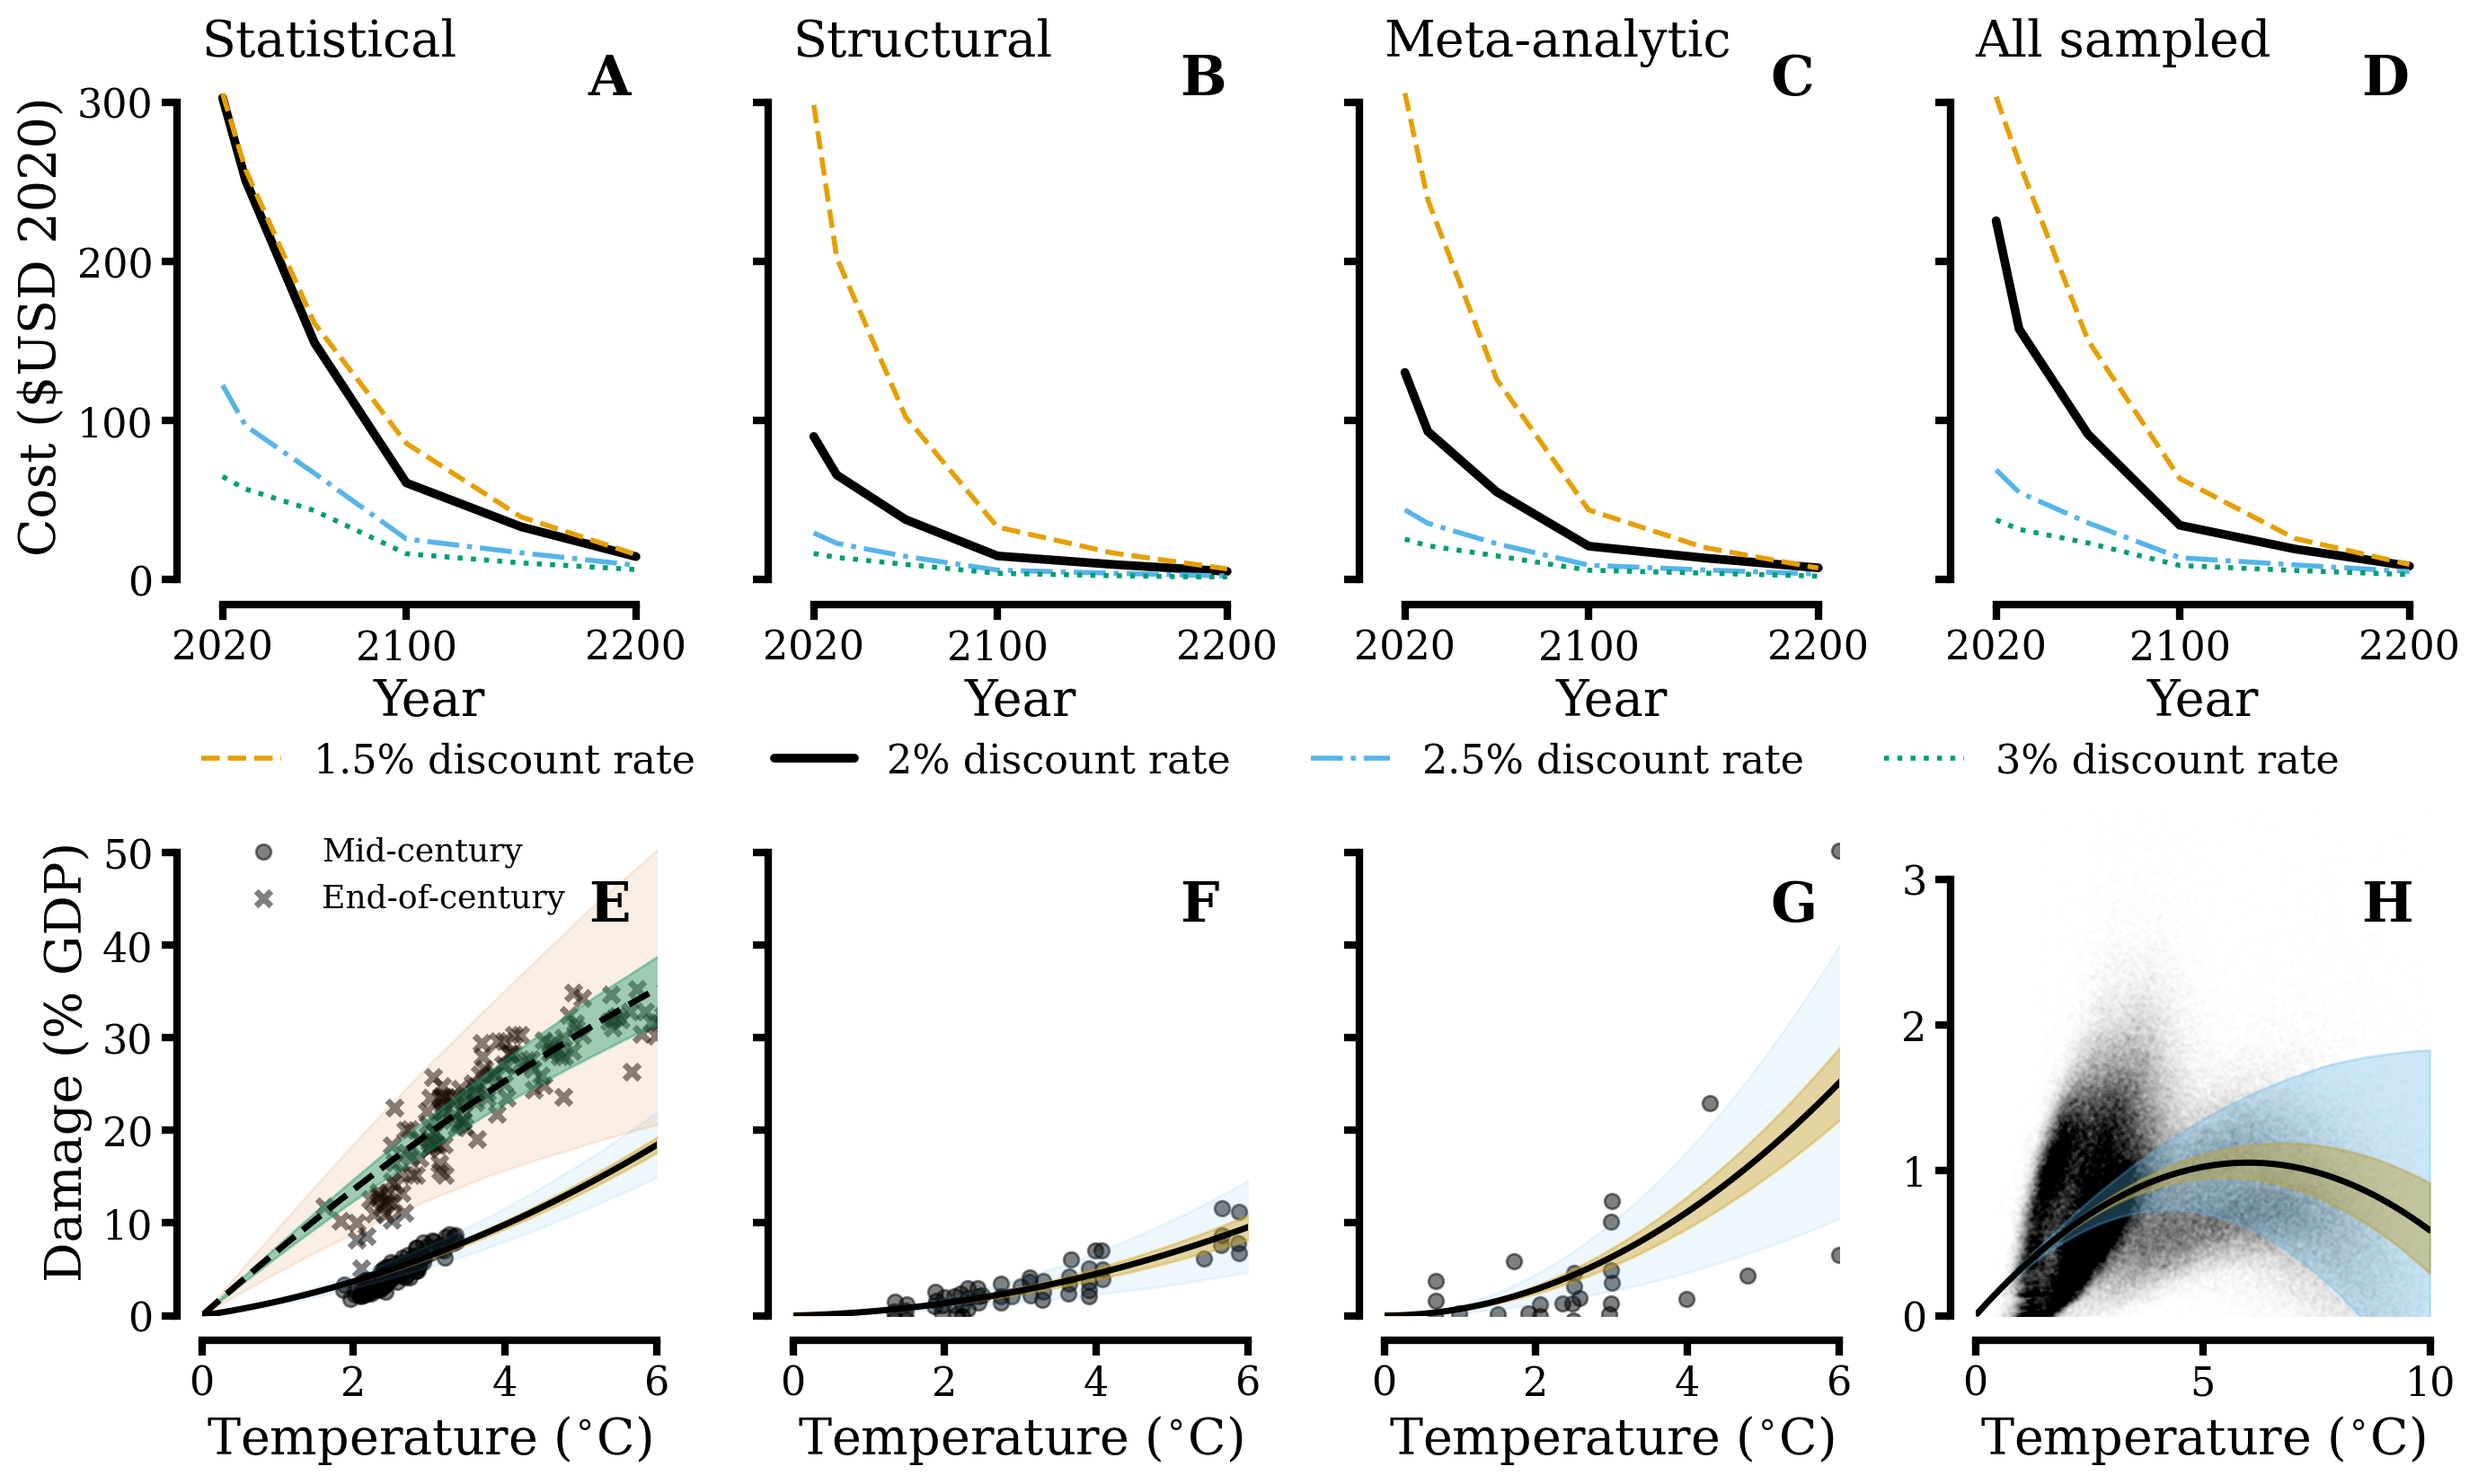

In [24]:
import matplotlib.transforms as mtransforms

cost_row = ['A', 'B', 'C', 'D']
df_row = ['E', 'F', 'G', 'H']

fig, ax = plt.subplot_mosaic([cost_row, df_row], sharex=False,
                             gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [1, 1, 1, 1]},
                            figsize=(16,9))

pref_lw = 3.5
feat_lw = 2
ax['A'].plot(node_times, np.mean(output_obj_list[4].price_path, axis=0), linestyle='solid', 
             label="2% discount rate", lw = pref_lw)
ax['A'].plot(node_times, np.mean(output_obj_list[5].price_path, axis=0), linestyle='dashed', 
             label="1.5% discount rate", lw = feat_lw)
ax['A'].plot(node_times, np.mean(output_obj_list[6].price_path, axis=0), linestyle='dashdot', 
             label="2.5% discount rate", lw = feat_lw)
ax['A'].plot(node_times, np.mean(output_obj_list[7].price_path, axis=0), linestyle='dotted', 
             label="3% discount rate", lw = feat_lw)
ax['A'].set_title("Statistical")
ax['A'].set_ylabel("Cost ($USD 2020)")

ax['B'].plot(node_times, np.mean(output_obj_list[8].price_path, axis=0), linestyle='solid', 
             label="2% discount rate", lw = pref_lw)
ax['B'].plot(node_times, np.mean(output_obj_list[9].price_path, axis=0), linestyle='dashed', 
             label="1.5% discount rate", lw = feat_lw)
ax['B'].plot(node_times, np.mean(output_obj_list[10].price_path, axis=0), linestyle='dashdot', 
             label="2.5% discount rate", lw = feat_lw)
ax['B'].plot(node_times, np.mean(output_obj_list[11].price_path, axis=0), linestyle='dotted', 
             label="3% discount rate", lw = feat_lw)
ax['B'].set_title("Structural")


ax['C'].plot(node_times, np.mean(output_obj_list[12].price_path, axis=0), linestyle='solid', 
             label="2% discount rate", lw = pref_lw)
ax['C'].plot(node_times, np.mean(output_obj_list[13].price_path, axis=0), linestyle='dashed', 
             label="1.5% discount rate", lw = feat_lw)
ax['C'].plot(node_times, np.mean(output_obj_list[14].price_path, axis=0), linestyle='dashdot', 
             label="2.5% discount rate", lw = feat_lw)
ax['C'].plot(node_times, np.mean(output_obj_list[15].price_path, axis=0), linestyle='dotted', 
             label="3% discount rate", lw = feat_lw)
ax['C'].set_title("Meta-analytic")


ax['D'].plot(node_times, np.mean(output_obj_list[1].price_path, axis=0), linestyle='dashed', 
             label="1.5% discount rate", lw = feat_lw, zorder=4, color=color_list[1])
ax['D'].plot(node_times, np.mean(output_obj_list[0].price_path, axis=0), linestyle='solid', 
             label="2% discount rate", lw = pref_lw, color='k')
ax['D'].plot(node_times, np.mean(output_obj_list[2].price_path, axis=0), linestyle='dashdot', 
             label="2.5% discount rate", lw = feat_lw, color=color_list[2])
ax['D'].plot(node_times, np.mean(output_obj_list[3].price_path, axis=0), linestyle='dotted', 
             label="3% discount rate", lw = feat_lw, color=color_list[3])
ax['D'].set_title("All sampled")

for i in cost_row:
    ax[i].set_ylim((0,350))
    ax[i].set_xticks([2020,2100,2200])
    ax[i].set_xticklabels(['2020', '2100', '2200'])
    ax[i].set_xlabel("Year")

ax['E'].plot(gmst, 100 * burke_mid_mean, linestyle='solid')
ax['E'].plot(gmst, 100 * burke_end_mean, linestyle='dashed', color='k')

ax['E'].scatter(burke_2049_ssp2_t, 100 * burke_2049_ssp2_d, alpha=0.5, marker='o', color='k', label='Mid-century')
ax['E'].scatter(burke_2099_ssp2_t, 100 * burke_2099_ssp2_d, alpha=0.5, marker='x', color='k', label='End-of-century')

ax['E'].fill_between(gmst, 100 * burke_mid_34, 100 * burke_mid_66, alpha=0.4, color=color_list[1])
ax['E'].fill_between(gmst, 100 * burke_mid_5, 100 * burke_mid_95, alpha=0.1, color=color_list[2])

ax['E'].fill_between(gmst, 100 * burke_end_34, 100 * burke_end_66, alpha=0.4, color=color_list[3])
ax['E'].fill_between(gmst, 100 * burke_end_5, 100 * burke_end_95, alpha=0.1, color=color_list[6])
ax['E'].set_ylabel("Damage (% GDP)")
ax['E'].legend(fontsize=13, loc='upper left')

ax['F'].plot(gmst, 100 * struct_mean)
ax['F'].scatter(struct_T, 100 * struct_d, alpha=0.5)
ax['F'].fill_between(gmst, struct_34 * 100, struct_66 * 100, alpha=0.4, color=color_list[1])
ax['F'].fill_between(gmst, struct_5 * 100, struct_95 * 100, alpha=0.1, color=color_list[2])

ax['G'].plot(gmst, meta_mean * 100)
ax['G'].scatter(hs_T, 100 * hs_d, alpha=0.5)
ax['G'].fill_between(gmst, meta_34 * 100, meta_66 * 100, alpha=0.4, color=color_list[1])
ax['G'].fill_between(gmst, meta_5 * 100, meta_95 * 100, alpha=0.1, color=color_list[2])

ax['H'].plot(gmst_tp, tp_dam_mean * 100)
ax['H'].scatter(tp_t, tp_d * 100, s=1.2, alpha=0.004)
ax['H'].fill_between(gmst_tp, tp_34 * 100, tp_66 * 100, alpha=0.5, color=color_list[1])
ax['H'].fill_between(gmst_tp, tp_5 * 100, tp_95 * 100, alpha=0.3, color=color_list[2])

ax['H'].set_xlabel("Temperature ($^{\circ}$C)")
ax['H'].set_xlim((0,10))
ax['H'].set_ylim((0,3.5))
ax['H'].set_yticks([0,1,2,3])
ax['H'].set_xticks([0,5,10])
    
for j in df_row[:-1]:
    ax[j].set_xlim((0,6))
    ax[j].set_ylim((0, 55))
    ax[j].set_xlabel("Temperature ($^{\circ}$C)")

ax['A'].set_yticks([0,100,200,300])
ax['B'].set_yticks([0,100,200,300])
ax['C'].set_yticks([0,100,200,300])
ax['D'].set_yticks([0,100,200,300])
ax['A'].set_ylim((0,320))
ax['B'].set_ylim((0,320))
ax['C'].set_ylim((0,320))
ax['D'].set_ylim((0,320))

sns.despine(offset=10, trim=True)
ax['D'].legend(loc='center', bbox_to_anchor=(-1.55, -0.355), ncol=5, fontsize=16)
fig.subplots_adjust(hspace=0.445, wspace=0.3)


# turn off y labels
turn_off_ylabels = ['B', 'C', 'D', 'F', 'G']
for i in turn_off_ylabels:
    ax[i].set_yticklabels([])

# label panels
for label in cost_row:
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(2.15, 0.1, fig.dpi_scale_trans)
    ax[label].text(0.0, 1.0, label, transform=ax[label].transAxes + trans, fontsize=22, fontweight='bold',
            verticalalignment='top', bbox=dict(facecolor='1', edgecolor='none', pad=1))
    ax[label].tick_params(axis='both', labelsize=16)
    
for label in df_row:
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(2.15, -0.4, fig.dpi_scale_trans)
    ax[label].text(0.0, 1.0, label, transform=ax[label].transAxes + trans, fontsize=22, fontweight='bold',
            verticalalignment='top', bbox=dict(facecolor='none', edgecolor='none', pad=1))
    ax[label].tick_params(axis='both', labelsize=16)
    

if save_fig:
    fig.savefig(''.join([basefile, 'unc-toggle-w-dfs.png']), bbox_inches='tight', dpi=400)

## Damage functions only

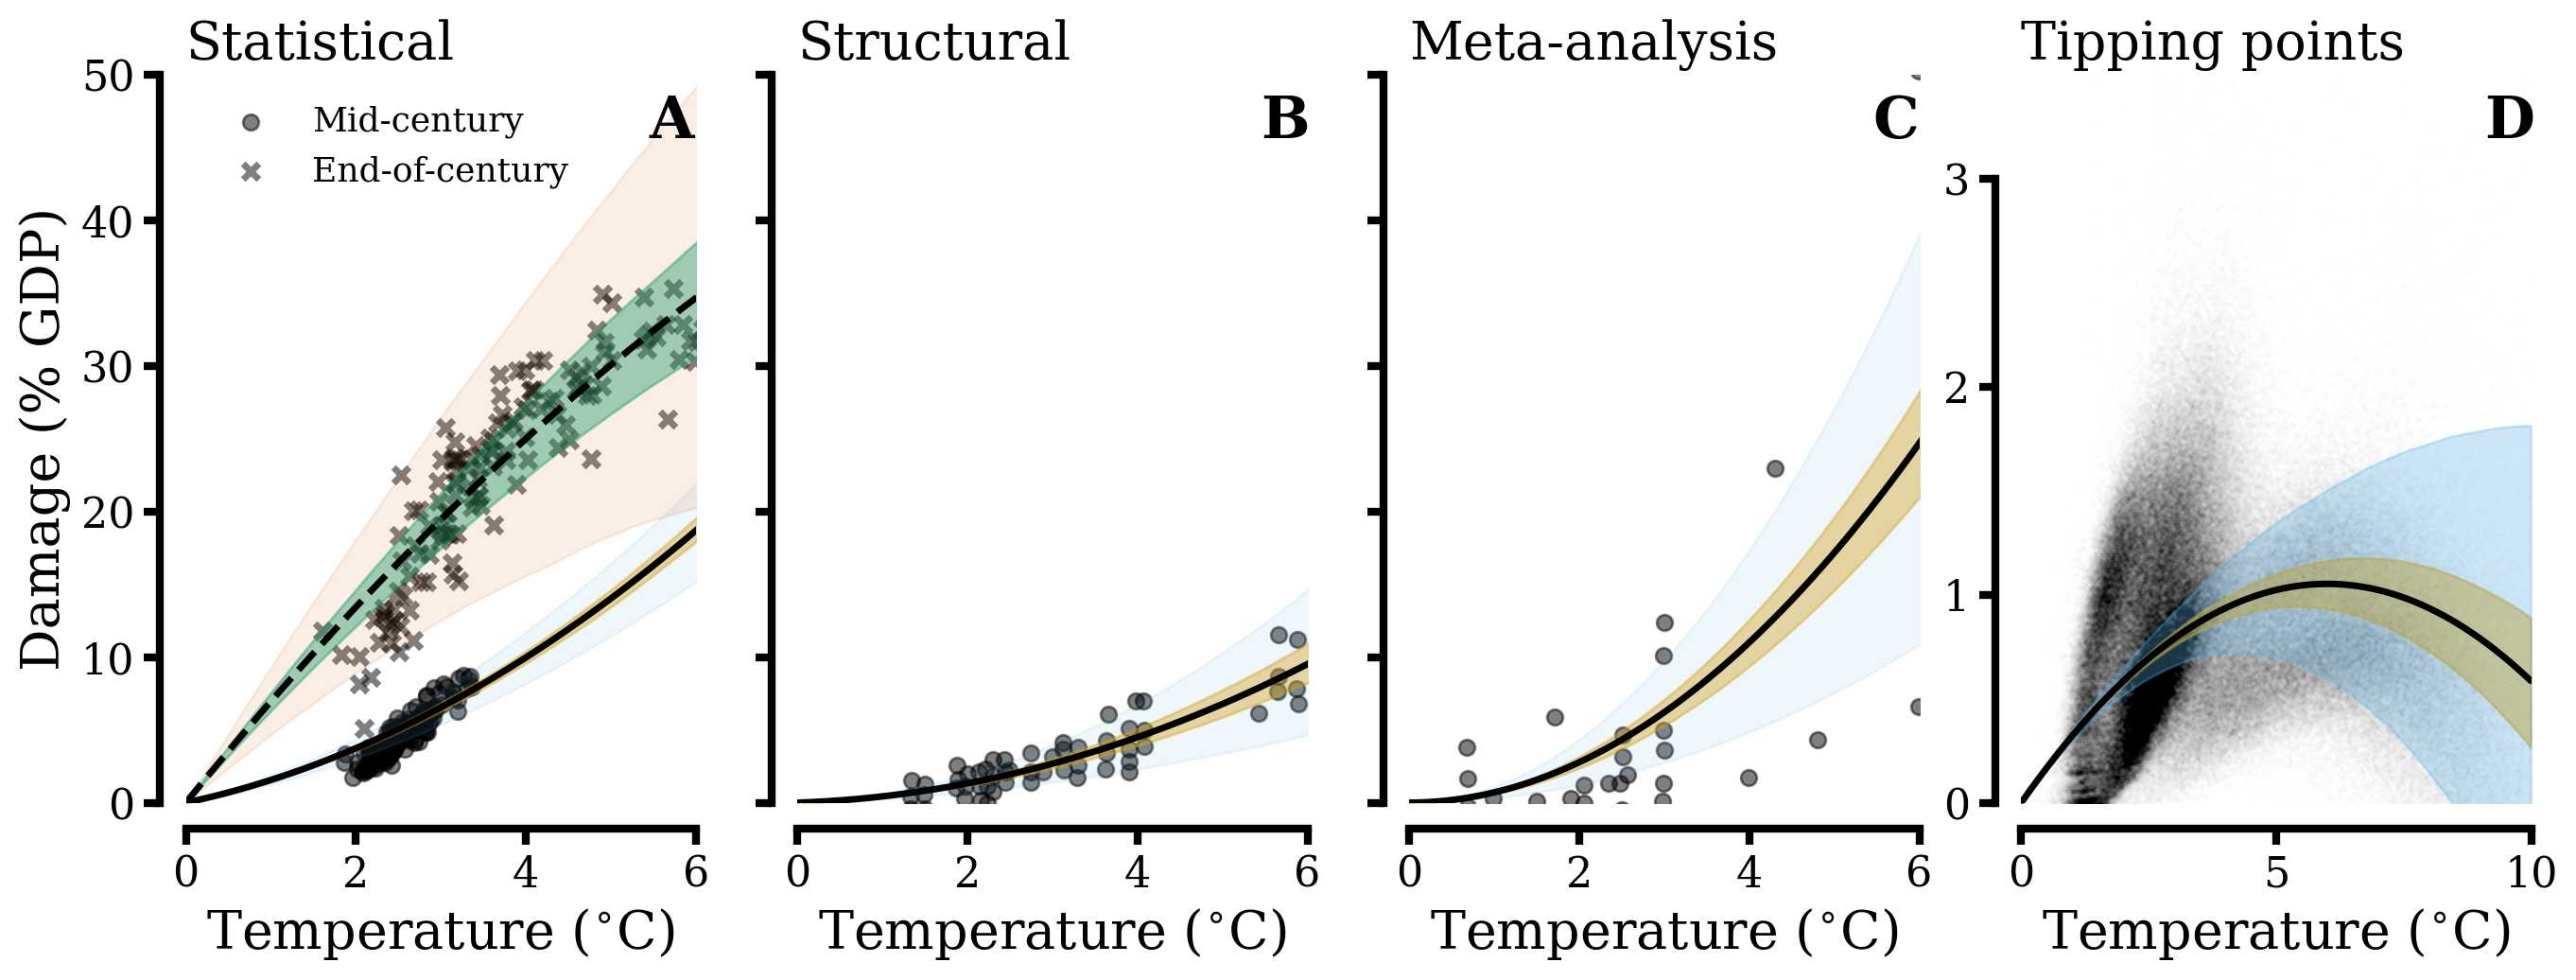

In [32]:
import matplotlib.transforms as mtransforms

df_row = ['A', 'B', 'C', 'D']

fig, ax = plt.subplot_mosaic([df_row], sharex=False,
                             gridspec_kw={'height_ratios': [1], 'width_ratios': [1, 1, 1, 1]},
                            figsize=(16,5))


ax['A'].plot(gmst, 100 * burke_mid_mean, linestyle='solid')
ax['A'].plot(gmst, 100 * burke_end_mean, linestyle='dashed', color='k')

ax['A'].scatter(burke_2049_ssp2_t, 100 * burke_2049_ssp2_d, alpha=0.5, marker='o', color='k', label='Mid-century')
ax['A'].scatter(burke_2099_ssp2_t, 100 * burke_2099_ssp2_d, alpha=0.5, marker='x', color='k', label='End-of-century')

ax['A'].fill_between(gmst, 100 * burke_mid_34, 100 * burke_mid_66, alpha=0.4, color=color_list[1])
ax['A'].fill_between(gmst, 100 * burke_mid_5, 100 * burke_mid_95, alpha=0.1, color=color_list[2])

ax['A'].fill_between(gmst, 100 * burke_end_34, 100 * burke_end_66, alpha=0.4, color=color_list[3])
ax['A'].fill_between(gmst, 100 * burke_end_5, 100 * burke_end_95, alpha=0.1, color=color_list[6])
ax['A'].set_ylabel("Damage (% GDP)")
ax['A'].legend(fontsize=13, loc='upper left')

ax['B'].plot(gmst, 100 * struct_mean)
ax['B'].scatter(struct_T, 100 * struct_d, alpha=0.5)
ax['B'].fill_between(gmst, struct_34 * 100, struct_66 * 100, alpha=0.4, color=color_list[1])
ax['B'].fill_between(gmst, struct_5 * 100, struct_95 * 100, alpha=0.1, color=color_list[2])

ax['C'].plot(gmst, meta_mean * 100)
ax['C'].scatter(hs_T, 100 * hs_d, alpha=0.5)
ax['C'].fill_between(gmst, meta_34 * 100, meta_66 * 100, alpha=0.4, color=color_list[1])
ax['C'].fill_between(gmst, meta_5 * 100, meta_95 * 100, alpha=0.1, color=color_list[2])

ax['D'].plot(gmst_tp, tp_dam_mean * 100)
ax['D'].scatter(tp_t, tp_d * 100, s=1.2, alpha=0.004)
ax['D'].fill_between(gmst_tp, tp_34 * 100, tp_66 * 100, alpha=0.5, color=color_list[1])
ax['D'].fill_between(gmst_tp, tp_5 * 100, tp_95 * 100, alpha=0.3, color=color_list[2])

ax['D'].set_xlabel("Temperature ($^{\circ}$C)")
ax['D'].set_xlim((0,10))
ax['D'].set_ylim((0,3.5))
ax['D'].set_yticks([0,1,2,3])
ax['D'].set_xticks([0,5,10])
    
for j in df_row[:-1]:
    ax[j].set_xlim((0,6))
    ax[j].set_ylim((0, 55))
    ax[j].set_xlabel("Temperature ($^{\circ}$C)")

ax['A'].set_yticks([0,10,20,30,40,50])
ax['B'].set_yticks([0,10,20,30,40,50])
ax['C'].set_yticks([0,10,20,30,40,50])
ax['B'].set_yticklabels([])
ax['C'].set_yticklabels([])
ax['D'].set_yticks([0,1,2,3])
ax['A'].set_ylim((0,50))
ax['B'].set_ylim((0,50))
ax['C'].set_ylim((0,50))

ax['A'].set_title("Statistical")
ax['B'].set_title("Structural")
ax['C'].set_title("Meta-analysis")
ax['D'].set_title("Tipping points")

for label in df_row:
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(2.45, -0.1, fig.dpi_scale_trans)
    ax[label].text(0.0, 1.0, label, transform=ax[label].transAxes + trans, fontsize=22, fontweight='bold',
            verticalalignment='top', bbox=dict(facecolor='none', edgecolor='none', pad=1))
    ax[label].tick_params(axis='both', labelsize=16)
    
sns.despine(trim=True, offset=10)

# Old one

In [ ]:
import matplotlib.transforms as mtransforms

cost_row = ['A', 'B', 'C', 'D']
df_row = ['E', 'F', 'G', 'H']

fig, ax = plt.subplot_mosaic([cost_row, df_row], sharex=False,
                             gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [1, 1, 1, 1]},
                            figsize=(16,10))

ax['A'].plot(node_times, np.mean(output_obj_list[1].price_path, axis=0), linestyle='solid', 
             label="Best estimate")
ax['A'].plot(node_times, np.mean(output_obj_list[8].price_path, axis=0), linestyle='solid', 
             label="TCRE, 1/2x variance")
ax['A'].plot(node_times, np.mean(output_obj_list[9].price_path, axis=0), linestyle='solid', 
             label="TCRE, 2x variance")
ax['A'].plot(node_times, np.mean(output_obj_list[10].price_path, axis=0), linestyle='solid', 
             label="Damage, 1/2x variance")
ax['A'].plot(node_times, np.mean(output_obj_list[11].price_path, axis=0), linestyle='solid', 
             label="Damage, 2x variance")

ax['A'].plot(node_times, np.mean(output_obj_list[24].price_path, axis=0), 
             color=color_list[0], linestyle='dashed')
ax['A'].plot(node_times, np.mean(output_obj_list[26].price_path, axis=0), 
             color=color_list[1], linestyle='dashed')
ax['A'].plot(node_times, np.mean(output_obj_list[25].price_path, axis=0), 
             color=color_list[2], linestyle='dashed')
ax['A'].plot(node_times, np.mean(output_obj_list[28].price_path, axis=0), 
             color=color_list[3], linestyle='dashed')
ax['A'].plot(node_times, np.mean(output_obj_list[27].price_path, axis=0), 
             color=color_list[4], linestyle='dashed')
ax['A'].set_title("Statistical")
ax['A'].set_ylabel("Cost ($USD 2020)")

ax['B'].plot(node_times, np.mean(output_obj_list[2].price_path, axis=0), linestyle='solid', 
             label="Best estimate")
ax['B'].plot(node_times, np.mean(output_obj_list[12].price_path, axis=0), linestyle='solid', 
             label="TCRE, 1/2x variance")
ax['B'].plot(node_times, np.mean(output_obj_list[13].price_path, axis=0), linestyle='solid', 
             label="TCRE, 2x variance")
ax['B'].plot(node_times, np.mean(output_obj_list[14].price_path, axis=0), linestyle='solid', 
             label="Damage, 1/2x variance")
ax['B'].plot(node_times, np.mean(output_obj_list[15].price_path, axis=0), linestyle='solid', 
             label="Damage, 2x variance")

ax['B'].plot(node_times, np.mean(output_obj_list[29].price_path, axis=0), linestyle='dashed', 
             color=color_list[0])
ax['B'].plot(node_times, np.mean(output_obj_list[31].price_path, axis=0), linestyle='dashed', 
             color=color_list[1])
ax['B'].plot(node_times, np.mean(output_obj_list[30].price_path, axis=0), linestyle='dashed', 
             color=color_list[2])
ax['B'].plot(node_times, np.mean(output_obj_list[33].price_path, axis=0), linestyle='dashed', 
             color=color_list[3])
ax['B'].plot(node_times, np.mean(output_obj_list[32].price_path, axis=0), linestyle='dashed', 
             color=color_list[4])
ax['B'].set_title("Structural")


ax['C'].plot(node_times, np.mean(output_obj_list[3].price_path, axis=0), linestyle='solid', 
             label="Best estimate")
ax['C'].plot(node_times, np.mean(output_obj_list[16].price_path, axis=0), linestyle='solid', 
             label="TCRE, 1/2x variance")
ax['C'].plot(node_times, np.mean(output_obj_list[17].price_path, axis=0), linestyle='solid', 
             label="TCRE, 2x variance")
ax['C'].plot(node_times, np.mean(output_obj_list[18].price_path, axis=0), linestyle='solid', 
             label="Damage, 1/2x variance")
ax['C'].plot(node_times, np.mean(output_obj_list[19].price_path, axis=0), linestyle='solid', 
             label="Damage, 2x variance")

ax['C'].plot(node_times, np.mean(output_obj_list[34].price_path, axis=0), linestyle='dashed', 
             color=color_list[0])
ax['C'].plot(node_times, np.mean(output_obj_list[36].price_path, axis=0), linestyle='dashed', 
             color=color_list[1])
ax['C'].plot(node_times, np.mean(output_obj_list[35].price_path, axis=0), linestyle='dashed', 
             color=color_list[2])
ax['C'].plot(node_times, np.mean(output_obj_list[38].price_path, axis=0), linestyle='dashed', 
             color=color_list[3])
ax['C'].plot(node_times, np.mean(output_obj_list[37].price_path, axis=0), linestyle='dashed', 
             color=color_list[4])
ax['C'].set_title("Meta-analytic")


ax['D'].plot(node_times, np.mean(output_obj_list[0].price_path, axis=0), linestyle='solid', 
             label="Best estimate")
ax['D'].plot(node_times, np.mean(output_obj_list[4].price_path, axis=0), linestyle='solid', 
             label="TCRE, 1/2x variance")
ax['D'].plot(node_times, np.mean(output_obj_list[5].price_path, axis=0), linestyle='solid', 
             label="TCRE, 2x variance")
ax['D'].plot(node_times, np.mean(output_obj_list[6].price_path, axis=0), linestyle='solid', 
             label="Damage, 1/2x variance")
ax['D'].plot(node_times, np.mean(output_obj_list[7].price_path, axis=0), linestyle='solid', 
             label="Damage, 2x variance")

ax['D'].plot(node_times, np.mean(output_obj_list[19].price_path, axis=0), linestyle='dashed', 
             color=color_list[0])
ax['D'].plot(node_times, np.mean(output_obj_list[21].price_path, axis=0), linestyle='dashed', 
             color=color_list[1])
ax['D'].plot(node_times, np.mean(output_obj_list[20].price_path, axis=0), linestyle='dashed', 
             color=color_list[2])
ax['D'].plot(node_times, np.mean(output_obj_list[23].price_path, axis=0), linestyle='dashed', 
             color=color_list[3])
ax['D'].plot(node_times, np.mean(output_obj_list[22].price_path, axis=0), linestyle='dashed', 
             color=color_list[4])
ax['D'].set_title("All sampled")

for i in cost_row:
    ax[i].set_ylim((0,350))
    ax[i].set_xticks([2020,2100,2200])
    ax[i].set_xticklabels(['2020', '2100', '2200'])
    ax[i].set_xlabel("Year")

ax['E'].plot(T, 100 * (T * (burke_m1 * T + burke_m2)), linestyle='solid')
ax['E'].scatter(burke_T, 100 * burke_dam, alpha=0.5)
ax['E'].fill_between(T, 100 * lowerpolyd[0,:], 100 * upperpolyd[0,:], alpha=0.2)
ax['E'].fill_between(T, 100 * lowerpolyds[0,:], 100 * upperpolyds[0,:], alpha=0.2)
ax['E'].set_ylabel("Damage (% GDP)")

ax['F'].plot(T, 100 * (T * (st_1 * T + st_2)))
ax['F'].scatter(struct_T, 100 * struct_dam, alpha=0.5)
ax['F'].fill_between(T, 100 * lowerpolyu[0,:], 100 * upperpolyu[0,:], alpha=0.2)
ax['F'].fill_between(T, 100 * lowerpolyus[0,:], 100 * upperpolyus[0,:], alpha=0.2)

ax['G'].plot(T, 100 * (T * (hs_1 * T + hs_2)))
ax['G'].scatter(hs_T, 100 * hs_dam, alpha=0.5)
ax['G'].fill_between(T, 100 * lowerpolyhs[0,:], 100 * upperpolyhs[0,:], alpha=0.2)
ax['G'].fill_between(T, 100 * lowerpolyhss[0,:], 100 * upperpolyhss[0,:], alpha=0.2)

ax['H'].plot(gmst, dam_mean)
ax['H'].scatter([2], [0.6])
ax['H'].fill_between(gmst, tp_lowerpolyd[0,:], tp_upperpolyd[0,:], alpha=0.2)
ax['H'].set_xlabel("Temperature ($^{\circ}$C)")
ax['H'].set_xlim((0,6))
ax['H'].set_ylim((-0.5,2.5))
    
for j in df_row[:-1]:
    ax[j].set_xlim((0,6))
    ax[j].set_ylim((0, 65))
    ax[j].set_xlabel("Temperature ($^{\circ}$C)")
    
sns.despine(offset=10, trim=True)
ax['D'].legend(loc='center', bbox_to_anchor=(-1.55, -0.325), ncol=5, fontsize=12)
fig.subplots_adjust(hspace=0.445, wspace=0.3)

# turn off y labels
turn_off_ylabels = ['B', 'C', 'D', 'F', 'G']
for i in turn_off_ylabels:
    ax[i].set_yticklabels([])

# label panels
for label in cost_row:
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(2.15, 0.1, fig.dpi_scale_trans)
    ax[label].text(0.0, 1.0, label, transform=ax[label].transAxes + trans, fontsize=22, fontweight='bold',
            verticalalignment='top', bbox=dict(facecolor='1', edgecolor='none', pad=1))
    ax[label].tick_params(axis='both', labelsize=16)
    
for label in df_row:
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(2.15, -0.4, fig.dpi_scale_trans)
    ax[label].text(0.0, 1.0, label, transform=ax[label].transAxes + trans, fontsize=22, fontweight='bold',
            verticalalignment='top', bbox=dict(facecolor='none', edgecolor='none', pad=1))
    ax[label].tick_params(axis='both', labelsize=16)
    

if save_fig:
    fig.savefig(''.join([basefile, 'unc-toggle-w-dfs.png']), dpi=400)

## Another try, one big panel with smaller others

In [ ]:
import matplotlib.transforms as mtransforms

cost_row = ['A', 'B', 'C', 'D']
df_row = ['E', 'F', 'G', 'H']

fig, ax = plt.subplot_mosaic([cost_row, df_row], sharex=False,
                             gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [1, 1, 1, 1]},
                            figsize=(16,10))

ax['A'].plot(node_times, np.mean(output_obj_list[10].price_path, axis=0), label="TCRE, 1/4x variance")
ax['A'].plot(node_times, np.mean(output_obj_list[11].price_path, axis=0), label="TCRE, 1/2x variance")
ax['A'].plot(node_times, np.mean(output_obj_list[12].price_path, axis=0), label="TCRE, BE variance")
ax['A'].plot(node_times, np.mean(output_obj_list[13].price_path, axis=0), label="TCRE, 1.5x variance")
ax['A'].plot(node_times, np.mean(output_obj_list[14].price_path, axis=0), label="TCRE, 2x variance")
ax['A'].plot(node_times, np.mean(output_obj_list[15].price_path, axis=0), label="Damage, 1/4x variance")
ax['A'].plot(node_times, np.mean(output_obj_list[16].price_path, axis=0), label="Damage, 1/2x variance")
ax['A'].plot(node_times, np.mean(output_obj_list[17].price_path, axis=0), label="Damage, BE variance")
ax['A'].plot(node_times, np.mean(output_obj_list[18].price_path, axis=0), label="Damage, 1.5x variance")
ax['A'].plot(node_times, np.mean(output_obj_list[19].price_path, axis=0), label="Damage, 2x variance")
ax['A'].set_title("Statistical")
ax['A'].set_ylabel("Cost ($USD 2020)")

ax['B'].plot(node_times, np.mean(output_obj_list[20].price_path, axis=0), label="TCRE, 1/4x variance")
ax['B'].plot(node_times, np.mean(output_obj_list[21].price_path, axis=0), label="TCRE, 1/2x variance")
ax['B'].plot(node_times, np.mean(output_obj_list[22].price_path, axis=0), label="TCRE, BE variance")
ax['B'].plot(node_times, np.mean(output_obj_list[23].price_path, axis=0), label="TCRE, 1.5x variance")
ax['B'].plot(node_times, np.mean(output_obj_list[24].price_path, axis=0), label="TCRE, 2x variance")
ax['B'].plot(node_times, np.mean(output_obj_list[25].price_path, axis=0), label="Damage, 1/4x variance")
ax['B'].plot(node_times, np.mean(output_obj_list[26].price_path, axis=0), label="Damage, 1/2x variance")
ax['B'].plot(node_times, np.mean(output_obj_list[27].price_path, axis=0), label="Damage, BE variance")
ax['B'].plot(node_times, np.mean(output_obj_list[28].price_path, axis=0), label="Damage, 1.5x variance")
ax['B'].plot(node_times, np.mean(output_obj_list[29].price_path, axis=0), label="Damage, 2x variance")
ax['B'].set_title("Structural")

ax['C'].plot(node_times, np.mean(output_obj_list[30].price_path, axis=0), label="TCRE, 1/4x variance")
ax['C'].plot(node_times, np.mean(output_obj_list[31].price_path, axis=0), label="TCRE, 1/2x variance")
ax['C'].plot(node_times, np.mean(output_obj_list[32].price_path, axis=0), label="TCRE, 1x variance")
ax['C'].plot(node_times, np.mean(output_obj_list[33].price_path, axis=0), label="TCRE, 1.5x variance")
ax['C'].plot(node_times, np.mean(output_obj_list[34].price_path, axis=0), label="TCRE, 2x variance")
ax['C'].plot(node_times, np.mean(output_obj_list[35].price_path, axis=0), label="Damage, 1/4x variance")
ax['C'].plot(node_times, np.mean(output_obj_list[36].price_path, axis=0), label="Damage, 1/2x variance")
ax['C'].plot(node_times, np.mean(output_obj_list[37].price_path, axis=0), label="Damage, 1x variance")
ax['C'].plot(node_times, np.mean(output_obj_list[38].price_path, axis=0), label="Damage, 1.5x variance")
ax['C'].plot(node_times, np.mean(output_obj_list[39].price_path, axis=0), label="Damage, 2x variance")
ax['C'].set_title("Meta-analytic")

ax['D'].plot(node_times, np.mean(output_obj_list[0].price_path, axis=0), label="TCRE, 1/4x variance")
ax['D'].plot(node_times, np.mean(output_obj_list[1].price_path, axis=0), label="TCRE, 1/2x variance")
ax['D'].plot(node_times, np.mean(output_obj_list[2].price_path, axis=0), label="TCRE, 1x variance")
ax['D'].plot(node_times, np.mean(output_obj_list[3].price_path, axis=0), label="TCRE, 1.5x variance")
ax['D'].plot(node_times, np.mean(output_obj_list[4].price_path, axis=0), label="TCRE, 2x variance")
ax['D'].plot(node_times, np.mean(output_obj_list[5].price_path, axis=0), label="Damage, 1/4x variance")
ax['D'].plot(node_times, np.mean(output_obj_list[6].price_path, axis=0), label="Damage, 1/2x variance")
ax['D'].plot(node_times, np.mean(output_obj_list[7].price_path, axis=0), label="Damage, 1x variance")
ax['D'].plot(node_times, np.mean(output_obj_list[8].price_path, axis=0), label="Damage, 1.5x variance")
ax['D'].plot(node_times, np.mean(output_obj_list[9].price_path, axis=0), label="Damage, 2x variance")
ax['D'].set_title("All sampled")

for i in cost_row:
    ax[i].set_ylim((0,350))
    ax[i].set_xticks([2020,2100,2200])
    ax[i].set_xticklabels(['2020', '2100', '2200'])
    ax[i].set_xlabel("Year")

ax['E'].plot(T, 100 * (T * (burke_m1 * T + burke_m2)), linestyle='solid')
ax['E'].scatter(burke_T, 100 * burke_dam, alpha=0.5)
ax['E'].fill_between(T, 100 * lowerpolyd[0,:], 100 * upperpolyd[0,:], alpha=0.2)
ax['E'].fill_between(T, 100 * lowerpolyds[0,:], 100 * upperpolyds[0,:], alpha=0.2)
ax['E'].set_ylabel("Damage (% GDP)")

ax['F'].plot(T, 100 * (T * (st_1 * T + st_2)))
ax['F'].scatter(struct_T, 100 * struct_dam, alpha=0.5)
ax['F'].fill_between(T, 100 * lowerpolyu[0,:], 100 * upperpolyu[0,:], alpha=0.2)
ax['F'].fill_between(T, 100 * lowerpolyus[0,:], 100 * upperpolyus[0,:], alpha=0.2)

ax['G'].plot(T, 100 * (T * (hs_1 * T + hs_2)))
ax['G'].scatter(hs_T, 100 * hs_dam, alpha=0.5)
ax['G'].fill_between(T, 100 * lowerpolyhs[0,:], 100 * upperpolyhs[0,:], alpha=0.2)
ax['G'].fill_between(T, 100 * lowerpolyhss[0,:], 100 * upperpolyhss[0,:], alpha=0.2)

ax['H'].plot(gmst, dam_mean)
ax['H'].scatter([2], [0.6])
ax['H'].fill_between(gmst, tp_lowerpolyd[0,:], tp_upperpolyd[0,:], alpha=0.2)
ax['H'].set_xlabel("Temperature ($^{\circ}$C)")
ax['H'].set_xlim((0,6))
    
for j in df_row[:-1]:
    ax[j].set_xlim((0,6))
    ax[j].set_ylim((0, 65))
    ax[j].set_xlabel("Temperature ($^{\circ}$C)")
    
sns.despine(offset=10, trim=True)
ax['D'].legend(loc='center', bbox_to_anchor=(-1.55, -0.35), ncol=5, fontsize=12)
fig.subplots_adjust(hspace=0.445, wspace=0.3)

# turn off y labels
turn_off_ylabels = ['B', 'C', 'D', 'F', 'G']
for i in turn_off_ylabels:
    ax[i].set_yticklabels([])

# label panels
for label in cost_row:
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(2.15, 0.1, fig.dpi_scale_trans)
    ax[label].text(0.0, 1.0, label, transform=ax[label].transAxes + trans, fontsize=22, fontweight='bold',
            verticalalignment='top', bbox=dict(facecolor='1', edgecolor='none', pad=1))
    
for label in df_row:
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(2.15, -0.4, fig.dpi_scale_trans)
    ax[label].text(0.0, 1.0, label, transform=ax[label].transAxes + trans, fontsize=22, fontweight='bold',
            verticalalignment='top', bbox=dict(facecolor='none', edgecolor='none', pad=1))

if save_fig:
    fig.savefig(''.join([basefile, 'unc-toggle-w-dfs.png']), dpi=400)

# The rest of this is old, but good to keep examples of how to make plots of the same nature

## CRRA-EIS Figure

Now we plot the sensitivity of price path to EIS when CRRA preferences are specified.

In [ ]:
fig, ax = plt.subplots(1)

eis = ['6/5', '9/10', '3/5', '1/3', '1/4', '1/7', '1/9', '1/13', '1/21']
color_list = ['#000000', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7'] * 2
marker_list = ['o', 's', 'P', '*', '<', 'v', '>', '^', 'p']
linestyle_list = ['solid', 'dashed', 'dashdot', 'dotted'] * 4

for i in range(12,20):
    ax.plot(node_times, np.mean(output_obj_list[i].price_path, axis=0), color=color_list[i-12], marker=marker_list[i-12],
            linestyle=linestyle_list[i-12], label=''.join(['EIS = ', eis[i-12]]), linewidth=2, markersize=4)

ax.legend(loc='upper center', frameon=False)
ax.set_xlabel("Year")
ax.set_ylabel("Cost\n($USD 2020)")
if save_fig:
    fig.savefig(''.join([basefile, 'unc-toggle.png']), dpi=400)

## Combining the above into one nice fig :)

In [ ]:
import matplotlib.transforms as mtransforms

fig, ax = plt.subplot_mosaic([['(a)', '(b)', '(c)'], ['(a)', '(d)', '(e)']], 
                             gridspec_kw={'height_ratios': [1, 1], 'width_ratios': [2, 1.2, 1.2]},
                            figsize=(24,10))

# crra fig
for i in range(12,20):
    ax['(a)'].plot(node_times, np.mean(output_obj_list[i].price_path, axis=0), color=color_list[i-12], marker=marker_list[i-12],
            linestyle=linestyle_list[i-12], label=''.join(['EIS = ', eis[i-12]]), linewidth=2, markersize=4)
ax['(a)'].set_xlabel("Year")
ax['(a)'].set_ylabel("Cost\n($USD 2020)")
ax['(a)'].legend(frameon=False, fontsize=20)
ax['(a)'].set_xticks([2020, 2050, 2100, 2150, 2200])
ax['(a)'].set_xticklabels([2020, 2050, 2100, 2150, 2200])

# damage unc toggling panels
ax['(b)'].plot(node_times, np.mean(output_obj_list[0].price_path, axis=0), color=color_list[0], marker=marker_list[0],
            linestyle=linestyle_list[0], label="Full uncertainty", linewidth=2, markersize=4)
ax['(b)'].plot(node_times, np.mean(output_obj_list[4].price_path, axis=0), color=color_list[1], marker=marker_list[1],
            linestyle=linestyle_list[1], label="TCRE uncertainty only", linewidth=2, markersize=4)
ax['(b)'].plot(node_times, np.mean(output_obj_list[5].price_path, axis=0), color=color_list[2], marker=marker_list[2],
            linestyle=linestyle_list[2], label="DF parametric uncertainty only", linewidth=2, markersize=4)
ax['(b)'].set_title("Structural uncertainty included")

ax['(c)'].plot(node_times, np.mean(output_obj_list[1].price_path, axis=0), color=color_list[0], marker=marker_list[0],
            linestyle=linestyle_list[0], label="Full uncertainty", linewidth=2, markersize=4)
ax['(c)'].plot(node_times, np.mean(output_obj_list[6].price_path, axis=0), color=color_list[1], marker=marker_list[1],
            linestyle=linestyle_list[1], label="TCRE uncertainty only", linewidth=2, markersize=4)
ax['(c)'].plot(node_times, np.mean(output_obj_list[7].price_path, axis=0), color=color_list[2], marker=marker_list[2],
            linestyle=linestyle_list[2], label="DF parametric uncertainty only", linewidth=2, markersize=4)
ax['(c)'].set_title("Statistically estimated DF")


ax['(d)'].plot(node_times, np.mean(output_obj_list[2].price_path, axis=0), color=color_list[0], marker=marker_list[0],
            linestyle=linestyle_list[0], label="Full uncertainty", linewidth=2, markersize=4)
ax['(d)'].plot(node_times, np.mean(output_obj_list[8].price_path, axis=0), color=color_list[1], marker=marker_list[1],
            linestyle=linestyle_list[1], label="TCRE uncertainty only", linewidth=2, markersize=4)
ax['(d)'].plot(node_times, np.mean(output_obj_list[9].price_path, axis=0), color=color_list[2], marker=marker_list[2],
            linestyle=linestyle_list[2], label="DF parametric uncertainty only", linewidth=2, markersize=4)
ax['(d)'].set_title("Structurally estimated DF")

ax['(e)'].plot(node_times, np.mean(output_obj_list[3].price_path, axis=0), color=color_list[0], marker=marker_list[0],
            linestyle=linestyle_list[0], label="Full uncertainty", linewidth=2, markersize=4)
ax['(e)'].plot(node_times, np.mean(output_obj_list[10].price_path, axis=0), color=color_list[1], marker=marker_list[1],
            linestyle=linestyle_list[1], label="TCRE uncertainty only", linewidth=2, markersize=4)
ax['(e)'].plot(node_times, np.mean(output_obj_list[11].price_path, axis=0), color=color_list[2], marker=marker_list[2],
            linestyle=linestyle_list[2], label="DF parametric uncertainty only", linewidth=2, markersize=4)
ax['(e)'].set_title("Meta-analytic DF")

for i in ['(b)', '(c)', '(d)', '(e)']:
    ax[i].legend(frameon=False)
    ax[i].set_ylim((0, max(np.mean(output_obj_list[1].price_path, axis=0)) + 20))
    ax[i].set_xticks([2020, 2050, 2100, 2150, 2200])
    ax[i].set_yticks([0,100,200,300])
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

for i in ['(d)', '(e)']:
    ax[i].set_xlabel("Year")
    ax[i].set_xticklabels([2020, 2050, 2100, 2150, 2200])
    
for i in ['(b)', '(d)']:
    ax[i].set_ylabel("Cost\n($USD 2020)")
    ax[i].set_yticklabels([0,100,200,300])

fig.tight_layout()

# label panels
for label, ax in ax.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(10/72, -10/72, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans, fontsize=20,
            verticalalignment='top', bbox=dict(facecolor='1', edgecolor='none', pad=1))
    
#fig.tight_layout()

if save_fig:
    fig.savefig(''.join([basefile, 'crra-unc-toggle-joined.png']), dpi=400)